In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
# !pip install ultralytics
# !pip install easyocr

In [14]:
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import easyocr
import re

In [4]:
# model = YOLO("/content/gdrive/MyDrive/detect_license_plate/yolov8m.pt")

In [5]:
# model.train(data="/content/gdrive/MyDrive/detect_license_plate/datasets/data.yaml", epochs=100)

In [6]:
# model = YOLO("/content/gdrive/MyDrive/detect_license_plate/best.pt")
# results = model.predict("/content/gdrive/MyDrive/detect_license_plate/datasets/test/test_1.jpg")

# for r in results:
#     boxes = r.boxes  # Boxes object for bbox outputs
#     masks = r.masks  # Masks object for segment masks outputs
#     probs = r.probs  # Class probabilities for classification outputs

# print(f"Đây là bounding box: {boxes}")
# print(boxes.xyxy[0].cpu().numpy())

In [15]:
# Load the YOLO model
model = YOLO("best_model/best_detect_plate.pt")
# Load iamge path
image_path = "data_test/0206_05783_b.jpg"

In [17]:
# Perform YOLO prediction
results = model.predict(image_path)
# Load the image
image = Image.open(image_path)

# Convert the image to a NumPy array
image_np = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Iterate through the results and draw bounding boxes
for result in results:                                         # iterate results
    boxes = result.boxes.cpu().numpy()                         # get boxes on cpu in numpy
    for box in boxes:                                          # iterate boxes
        r = box.xyxy[0].astype(int)                            # get corner points as int
        print(r)                                               # print boxes
        cropped_image = image_np[r[1]:r[3], r[0]:r[2]]
        image_np = cv2.rectangle(image_np, r[:2], r[2:], (0, 255, 0), 2)

new_size = (200, 200)
resized_image = cv2.resize(cropped_image, new_size)


image 1/1 d:\AI Engineer\1. Computer Vision\Read Plate YOLO+EASYOCR\data_test\0206_05783_b.jpg: 416x640 1 0, 989.4ms
Speed: 13.0ms preprocess, 989.4ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
[190  10 285  91]


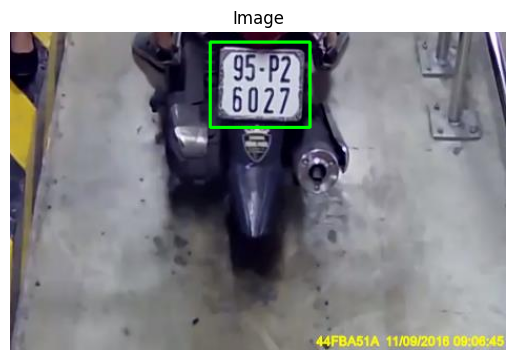

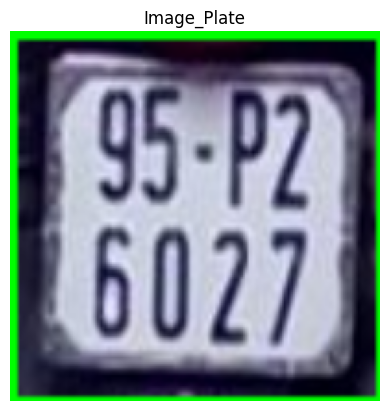

In [18]:
# Display the original image with bounding boxes
plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
plt.title("Image")
plt.axis("off")
plt.show()

# Display the resized image
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title("Image_Plate")
plt.axis("off")
plt.show()


In [19]:
x1, y1 = 0, 0  # Top-left corner
x2, y2 = 200, 100  # Bottom-right corner

image_1 = [10,200,100,200]
image_2 = [10,200,10,100]

cropped_1 = resized_image[image_1[2]:image_1[3], image_1[0]:image_1[1]]
cropped_2 = resized_image[image_2[2]:image_2[3], image_2[0]:image_2[1]]

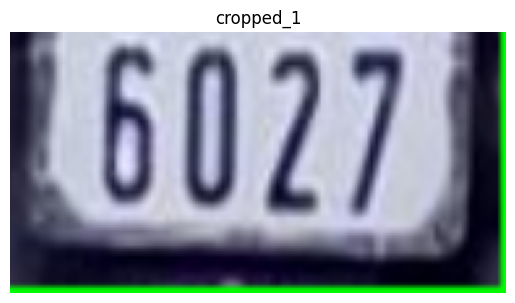

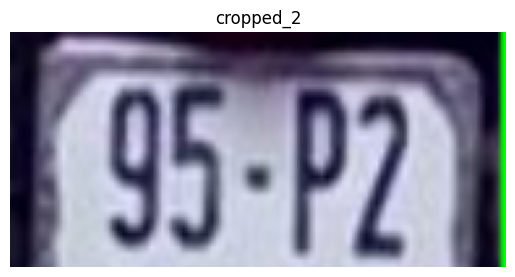

In [20]:
# Display the original image with bounding boxes
plt.imshow(cv2.cvtColor(cropped_1, cv2.COLOR_BGR2RGB))
plt.title("cropped_1")
plt.axis("off")
plt.show()

# Display the resized image
plt.imshow(cv2.cvtColor(cropped_2, cv2.COLOR_BGR2RGB))
plt.title("cropped_2")
plt.axis("off")
plt.show()


In [21]:
def remove_special_characters(input_string):
    # Define a regex pattern to match special characters
    pattern = r'[^a-zA-Z0-9]'  # This pattern allows alphanumeric characters and spaces

    # Use re.sub to replace the matched special characters with an empty string
    result_string = re.sub(pattern, "", input_string)

    return result_string


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.




Biển số xe: 95P2-6027


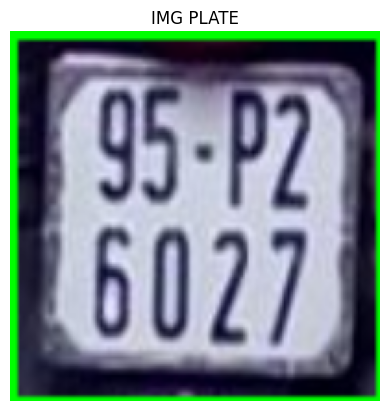

In [22]:
# Tạo một đối tượng EasyOCR với ngôn ngữ bạn muốn sử dụng
reader = easyocr.Reader(['en'])  # 'en' cho tiếng Anh, bạn có thể chọn ngôn ngữ khác tùy thuộc vào nhu cầu

# Đọc biển số từ hình ảnh
result_1 = reader.readtext(cropped_2)
result_2 = reader.readtext(cropped_1)

for detection in result_1:
    text_1 = detection[1]
for detection in result_2:
    text_2 = detection[1]

# In kết quả
print(f"\n\nBiển số xe: {remove_special_characters(text_1)}-{remove_special_characters(text_2)}")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title("IMG PLATE")
plt.axis("off")
plt.show()